# Project 2: Clustering

In [34]:
# Import all needed library needed
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import text
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1 

In [41]:
# Importing the two class data & 
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware', 'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)

# list of category indices of the documents
# Since we want to do 2 classes instead of 8 categories
labels = dataset.target // 4 

# Transforming the documents into TF-IDF
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=3, stop_words=stop_words)
tfidf_dataset = vectorizer.fit_transform(dataset.data)

print ("n_samples: %d, n_features: %d" % tfidf_dataset.shape) # dimensions are (7882, 27768)


n_samples: 7882, n_features: 27768


## Part 2

In [14]:
# K-clustering 
# n_cluster = k = 2 since there are two classes we are looking at
km = KMeans(n_clusters=2, n_init = 30).fit(tfidf_dataset)


# labels are the actual cluster
# km.labels_ are the predicted cluster
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))


Confusion Matrix is  [[3899    4]
 [2262 1717]]
Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted Rand-Index: 0.181
Adjusted Mutual info score: 0.253


## Part 3

### (a - i) Variance

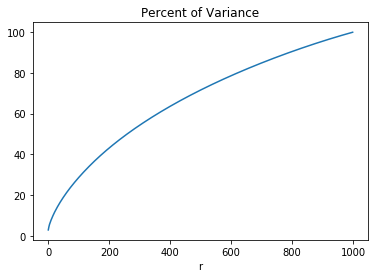

In [43]:
def calculate_svd_variance(tfidf):
    x_svd = TruncatedSVD(n_components = 1000) # n_components is desired dimensionality of output data
    x_svd.fit_transform(tfidf) # Transform the data
    singular_values_squared = np.square(x_svd.singular_values_) 
    sum_sv = 0
    var = []
    for i in singular_values_squared:
        sum_sv = sum_sv+i
        var.append(sum_sv)
    
    r = list(xrange(1000))
    plt.figure(1)
    plt.plot(np.cumsum(singular_values_squared)/np.sum(singular_values_squared)*100)
    plt.title('Percent of Variance')
    plt.xlabel('r')
    
calculate_svd_variance(tfidf_dataset)

### (a-ii) SVD

Calculating SVD for dimension, r =   1
Confusion Matrix is  [[2187 1716]
 [2307 1672]]
Calculating SVD for dimension, r =   2
Confusion Matrix is  [[3694  209]
 [ 441 3538]]
Calculating SVD for dimension, r =   3
Confusion Matrix is  [[  35 3868]
 [2562 1417]]
Calculating SVD for dimension, r =   5
Confusion Matrix is  [[   5 3898]
 [1540 2439]]
Calculating SVD for dimension, r =   10
Confusion Matrix is  [[   3 3900]
 [1617 2362]]
Calculating SVD for dimension, r =   20
Confusion Matrix is  [[3900    3]
 [2369 1610]]
Calculating SVD for dimension, r =   50
Confusion Matrix is  [[3900    3]
 [2332 1647]]
Calculating SVD for dimension, r =   100
Confusion Matrix is  [[   3 3900]
 [1655 2324]]
Calculating SVD for dimension, r =   300
Confusion Matrix is  [[   3 3900]
 [1655 2324]]


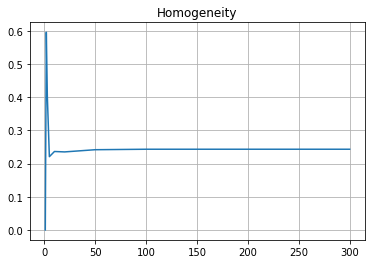

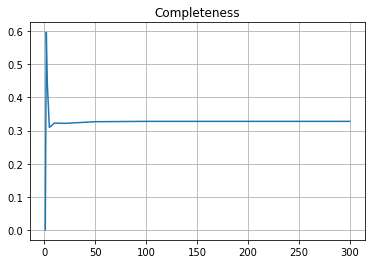

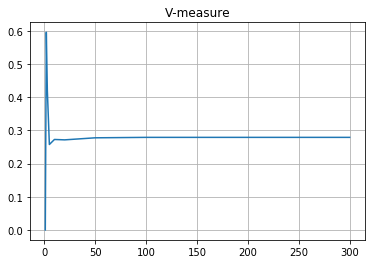

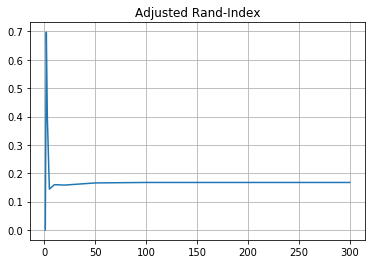

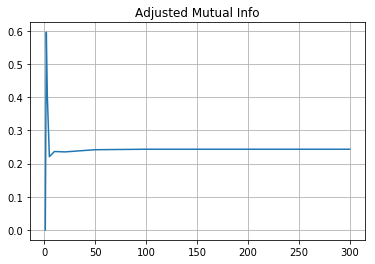

In [45]:
def calculate_SVD_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating SVD for dimension, r =  ", n
        x_svd = TruncatedSVD(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_svd)
        
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_SVD_score(tfidf_dataset, labels)

### (a - ii) NMF

Calculating NMF for dimension, r =   1
Confusion Matrix is  [[1703 2200]
 [1656 2323]]
Calculating NMF for dimension, r =   2
Confusion Matrix is  [[ 309 3594]
 [3821  158]]
Calculating NMF for dimension, r =   3
Confusion Matrix is  [[3899    4]
 [2396 1583]]
Calculating NMF for dimension, r =   5
Confusion Matrix is  [[3898    5]
 [2677 1302]]
Calculating NMF for dimension, r =   10
Confusion Matrix is  [[3899    4]
 [2618 1361]]
Calculating NMF for dimension, r =   20
Confusion Matrix is  [[  22 3881]
 [1397 2582]]
Calculating NMF for dimension, r =   50
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   100
Confusion Matrix is  [[3893   10]
 [3979    0]]
Calculating NMF for dimension, r =   300
Confusion Matrix is  [[3628  275]
 [3976    3]]


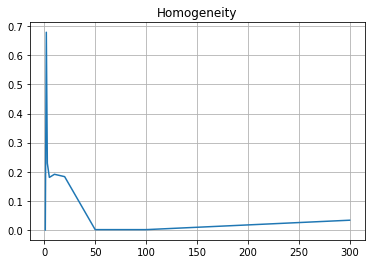

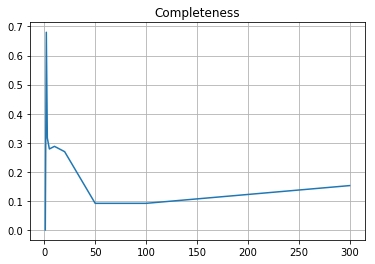

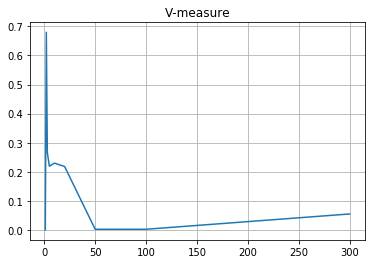

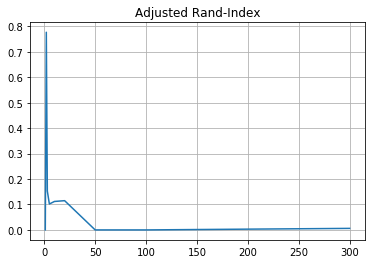

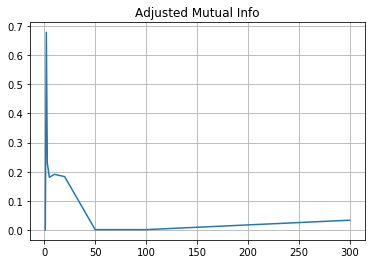

In [46]:
def calculate_NMF_score(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating NMF for dimension, r =  ", n
        x_nmf = NMF(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)
        
        # For some reason, x, y position of matrix is switched in the solution
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_NMF_score(tfidf_dataset, labels)

## Part 4
### (a) SVD

In [47]:
# We picked the best to be 2
r = 2
x_svd = TruncatedSVD(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_svd = KMeans(n_clusters=2, n_init = 30).fit(x_svd)

Text(0.5,1,u'K-mean (predicted) Clustering')

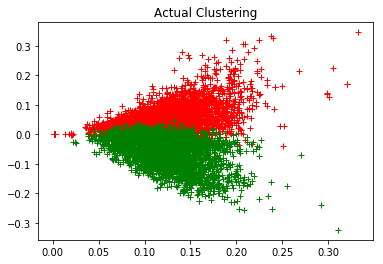

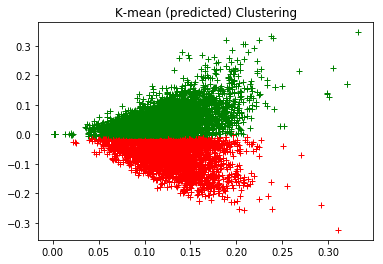

In [43]:
# Visualizition SVD (Actual)
x1 = x_svd[labels == 0][:,0]
y1 = x_svd[labels == 0][:,1]

x2 = x_svd[labels == 1][:,0]
y2 = x_svd[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition SVD K-clustering (Predicted)
x1 = x_svd[km_svd.labels_ == 0][:,0]
y1 = x_svd[km_svd.labels_ == 0][:,1]

x2 = x_svd[km_svd.labels_ == 1][:,0]
y2 = x_svd[km_svd.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')


In [48]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_svd.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_svd.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_svd.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_svd.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_svd.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_svd.labels_))


Confusion Matrix is  [[3663  240]
 [ 372 3607]]
Homogeneity: 0.608
Completeness: 0.609
V-measure: 0.609
Adjusted Rand-Index: 0.713
Adjusted Mutual info score: 0.608


### (a) NMF

In [67]:
# We picked the best to be 2
r = 2
x_nmf = NMF(n_components = r).fit_transform(tfidf_dataset) # n_components is desired dimensionality of output data
km_nmf = KMeans(n_clusters=2, n_init = 30).fit(x_nmf)

Text(0.5,1,u'K-mean (predicted) Clustering')

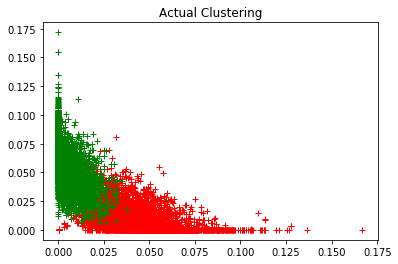

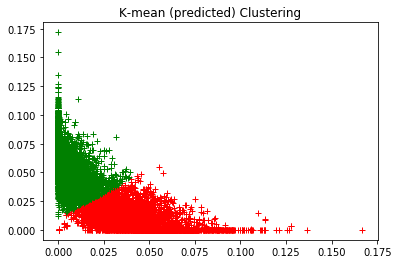

In [68]:
# Visualizition NMF (Actual)
x1 = x_nmf[labels == 0][:,0]
y1 = x_nmf[labels == 0][:,1]

x2 = x_nmf[labels == 1][:,0]
y2 = x_nmf[labels == 1][:,1]

plt.figure(1)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('Actual Clustering')

# Visualizition NMF K-clustering (Predicted)
x1 = x_nmf[km_nmf.labels_ == 0][:,0]
y1 = x_nmf[km_nmf.labels_ == 0][:,1]

x2 = x_nmf[km_nmf.labels_ == 1][:,0]
y2 = x_nmf[km_nmf.labels_ == 1][:,1]

plt.figure(2)
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.title('K-mean (predicted) Clustering')

In [84]:
print "Confusion Matrix is ", metrics.confusion_matrix(labels, km_nmf.labels_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km_nmf.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km_nmf.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km_nmf.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km_nmf.labels_))
print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km_nmf.labels_))


Confusion Matrix is  [[3594  309]
 [ 158 3821]]
Homogeneity: 0.679
Completeness: 0.680
V-measure: 0.680
Adjusted Rand-Index: 0.777
Adjusted Mutual info score: 0.679


### (b) Normalizing Features (SVD)

Confusion Matrix is  [[1709 2194]
 [3735  244]]
Homogeneity: 0.235
Completeness: 0.263
V-measure: 0.248
Adjusted Rand-Index: 0.254
Adjusted Mutual info score: 0.235


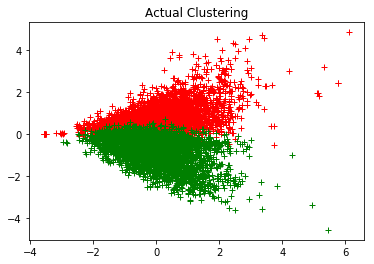

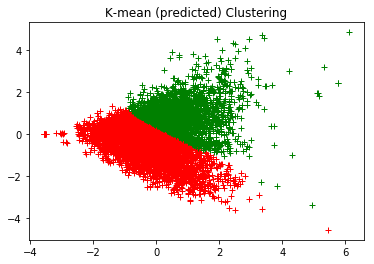

In [49]:

def calculate_normalized_score(svd, labels):
    norm = StandardScaler()
    x_svd_norm = norm.fit_transform(svd)
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_svd_norm)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_svd_norm[labels == 0][:,0]
    y1 = x_svd_norm[labels == 0][:,1]

    x2 = x_svd_norm[labels == 1][:,0]
    y2 = x_svd_norm[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_svd_norm[km.labels_ == 0][:,0]
    y1 = x_svd_norm[km.labels_ == 0][:,1]

    x2 = x_svd_norm[km.labels_ == 1][:,0]
    y2 = x_svd_norm[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_svd, labels)

### (b) Normalizing Features (NMF)

Confusion Matrix is  [[3534  369]
 [ 106 3873]]
Homogeneity: 0.683
Completeness: 0.686
V-measure: 0.684
Adjusted Rand-Index: 0.773
Adjusted Mutual info score: 0.683


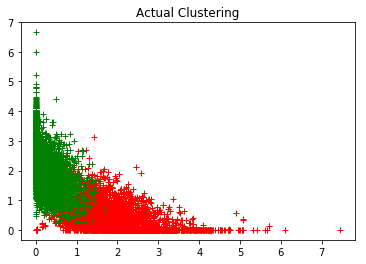

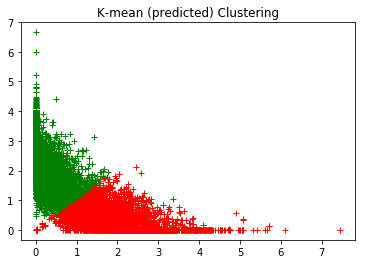

In [149]:
def calculate_normalized_score(nmf, labels):
    norm = StandardScaler(with_mean=False)
    x_nmf_log = norm.fit_transform(nmf)
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_score(x_nmf, labels)

### (b) Non-Linear Transformation

Confusion Matrix is  [[ 212 3691]
 [3796  183]]
Homogeneity: 0.713
Completeness: 0.713
V-measure: 0.713
Adjusted Rand-Index: 0.810
Adjusted Mutual info score: 0.713


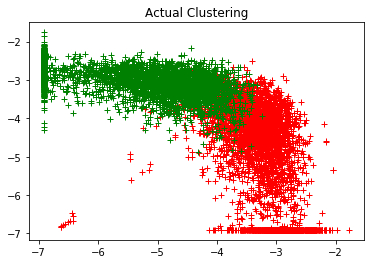

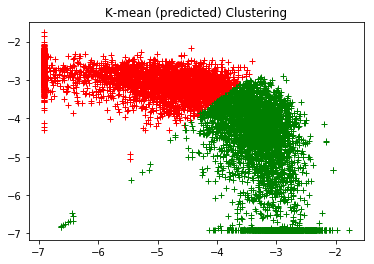

In [127]:
def calculate_nonlinear_score(nmf, labels):
    x_nmf_log = np.log(nmf+0.001) # add constant
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_nonlinear_score(x_nmf, labels)

### (b) Normalize then Log

Confusion Matrix is  [[3661  242]
 [ 162 3817]]
Homogeneity: 0.709
Completeness: 0.710
V-measure: 0.710
Adjusted Rand-Index: 0.805
Adjusted Mutual info score: 0.709


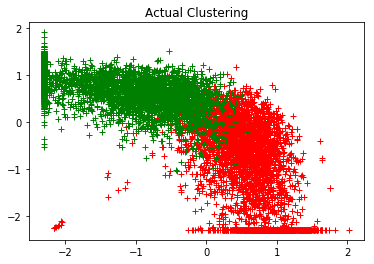

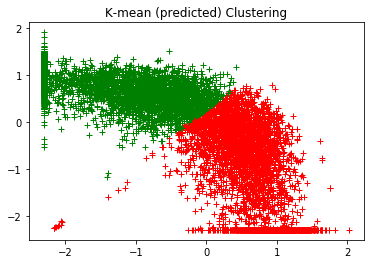

In [159]:
def calculate_normalized_log_score(nmf, labels):
    norm = StandardScaler(with_mean=False)
    x_nmf_norm = norm.fit_transform(nmf)
    x_nmf_log = np.log(x_nmf_norm+0.1) # add constant so 
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_normalized_log_score(x_nmf, labels)

### (b) log then normalize

Confusion Matrix is  [[ 386 3517]
 [3877  102]]
Homogeneity: 0.678
Completeness: 0.681
V-measure: 0.680
Adjusted Rand-Index: 0.768
Adjusted Mutual info score: 0.678


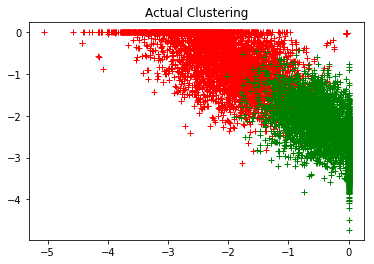

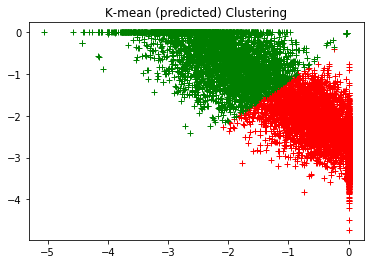

In [160]:
def calculate_log_normalized_score(nmf, labels):
    x_nmf_log = nmf* np.log(nmf+0.01) # add constant so 
    norm = StandardScaler(with_mean=False)
    x_nmf_log = norm.fit_transform(x_nmf_log)
    
    km = KMeans(n_clusters=2, n_init = 30).fit(x_nmf_log)
    
    print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Visualizition NMF (Actual)
    x1 = x_nmf_log[labels == 0][:,0]
    y1 = x_nmf_log[labels == 0][:,1]

    x2 = x_nmf_log[labels == 1][:,0]
    y2 = x_nmf_log[labels == 1][:,1]

    plt.figure(1)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('Actual Clustering')

    # Visualizition NMF K-clustering (Predicted)
    x1 = x_nmf_log[km.labels_ == 0][:,0]
    y1 = x_nmf_log[km.labels_ == 0][:,1]

    x2 = x_nmf_log[km.labels_ == 1][:,0]
    y2 = x_nmf_log[km.labels_ == 1][:,1]

    plt.figure(2)
    plt.plot(x1, y1, 'r+')
    plt.plot(x2, y2, 'g+')
    plt.title('K-mean (predicted) Clustering')
calculate_log_normalized_score(x_nmf, labels)

## Part 5

In [56]:
# Importing the two class data & 
twenty_dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42) # if categories are blank, then automatically all categories are loaded

# list of category indices of the documents
labels_20 = twenty_dataset.target  

# Transforming the documents into TF-IDF
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=3, stop_words=stop_words)
tfidf_dataset_20 = vectorizer.fit_transform(twenty_dataset.data)

print ("n_samples: %d, n_features: %d" % tfidf_dataset_20.shape) # dimensions are (7882, 27768)


n_samples: 18846, n_features: 52295


## SVD

### Testing out different dimensions

Calculating SVD for dimension, r =   1
Confusion Matrix is  [[ 81  47  51  68   1  20  14  78   5  52  67  33   0  23  74   0  12  75
   21  77]
 [ 41 123   8  92  46   2  70  59   3 117  27 125  24   5  41   2   2  60
  101  25]
 [ 71  99  27 103  18   4  49  90   0 107  37  77  23  16  56   0   3 119
   50  36]
 [ 81  85  34 106  28   2  51  79   0  97  60  98   3  10  44   0   1  99
   73  31]
 [ 69 104  24 100  34   1  43  75   3 106  47  95   2   7  53   0   2  91
   72  35]
 [ 38 109   5  85  82   1 106  57   7  88  16 121  18   5  31   0   1  71
  131  16]
 [ 58 132  10  89  59   0  93  61   1 112  24 115   6   3  35   0   0  67
  101   9]
 [ 63  84  28 114  26   9  61  90   1 107  51  79   2  12  44   0   1 105
   82  31]
 [ 68 124  10 127  17   2  43  74   0 124  29 102   0   6  34   0   0 119
   80  37]
 [ 92  93  20  87  27   8  42  98   1 109  45  89   5  19  69   0   1  90
   62  37]
 [ 69  97  14  95  45   5  56  99   1 107  42  92   8   8  50   0   1  98
   84  28]
 [107

Confusion Matrix is  [[171   1 151   0   1   0   0  66   0   0 145   0  38   1   1   0  16 145
   63   0]
 [403   1   0 303   0   0   0 133   0   0   1   2   0  19   2   0   7   7
   95   0]
 [178   0   0 650   0   0   0  74  11   0   0   2   0   3  11   0  15   5
   36   0]
 [279   0   0 230   0   4   0 192 197   0   0   3   0  12   4   0  30   1
   30   0]
 [557   0   0  97   0   1   0 149  76   0   0  13   1  11   1   0  24   8
   25   0]
 [306   0   0 357   4   0   0 189   0   0   0   2   0  30   1   0   3   1
   95   0]
 [601   3   0  52   0  10   0 194  49   0   0  32   0   4   8   0  13   3
    6   0]
 [310   2   0   2   0   0   0 499   0   0   0  31   0  15   0   0  21  83
   27   0]
 [236   0   0   0   0   1   0 585   0   0   0   7   0  21   1   0   9  32
  104   0]
 [401   4   0   0   0 399   0 153   0   0   0   7   0   4   1   0   1  22
    2   0]
 [146   0   0   0   0 786   0  46   0   0   0   6   0   5   0   0   5   3
    2   0]
 [126  16   0  16 496   0   0 166   0   1   

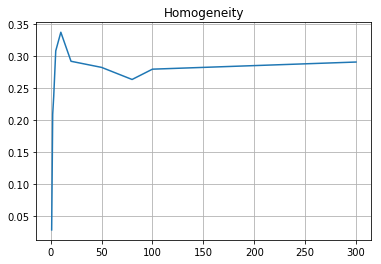

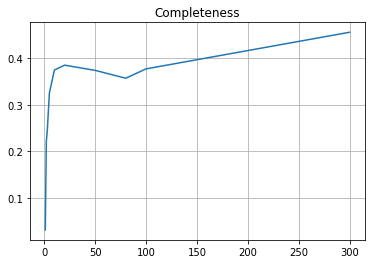

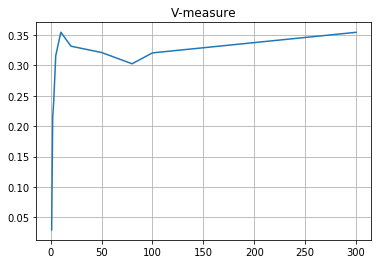

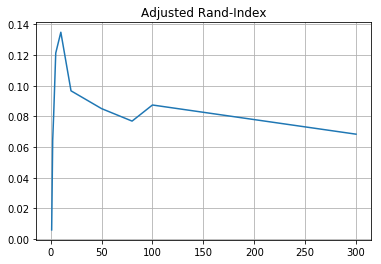

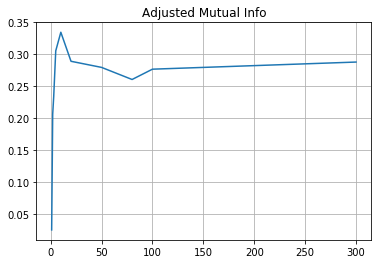

In [58]:
def calculate_SVD_score_20(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 80, 100, 300] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating SVD for dimension, r =  ", n
        x_svd = TruncatedSVD(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=20, n_init = 30).fit(x_svd)
        
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_SVD_score_20(tfidf_dataset_20, labels_20)

### Using best r (visualize)

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('ConfusionMatrix.png')

Confusion matrix, without normalization
Homogeneity: 0.318
Completeness: 0.367
V-measure: 0.341
Adjusted Rand-Index: 0.129
Adjusted Mutual info score: 0.316


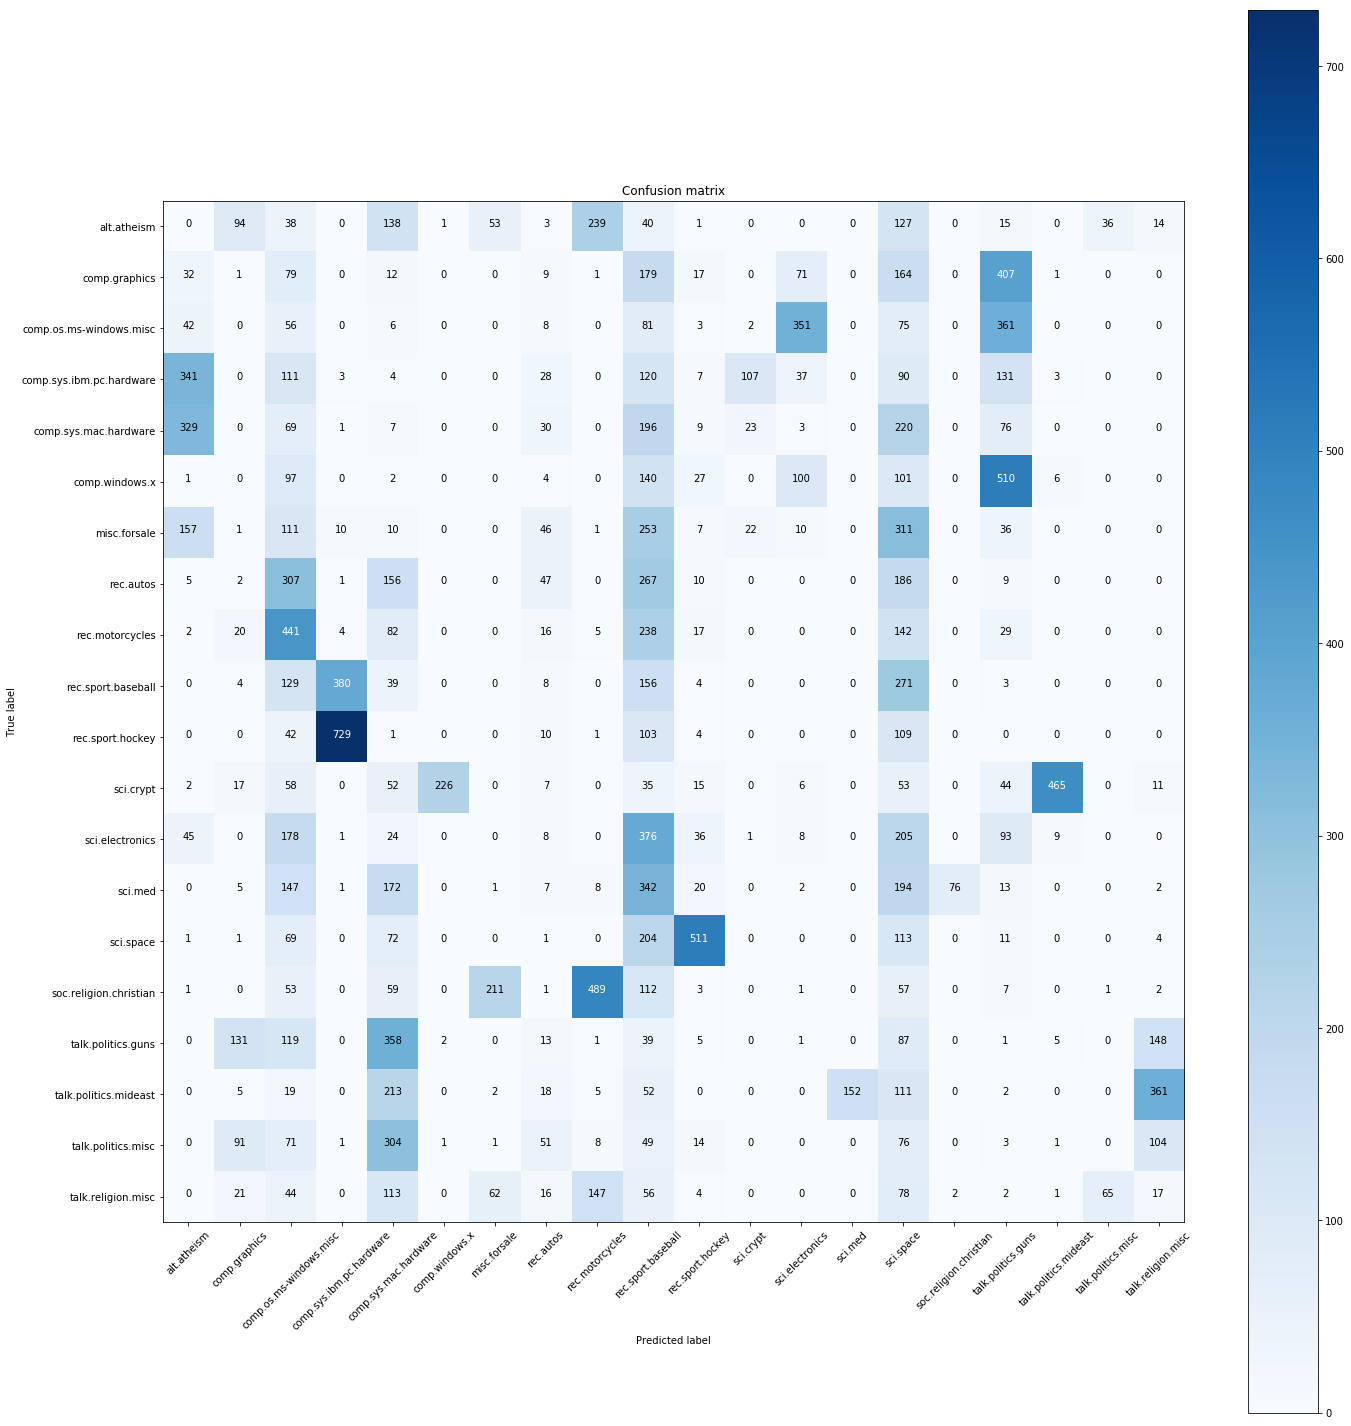

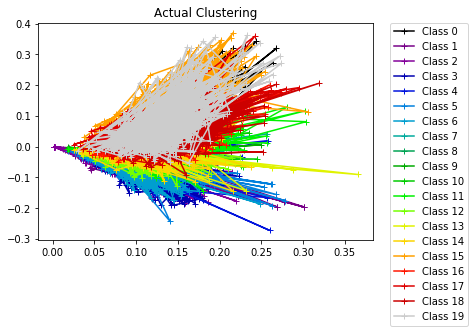

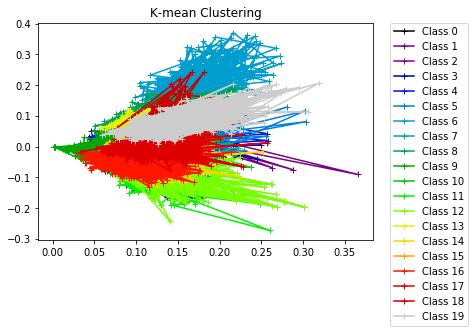

In [61]:
def visualize_svd_20(tfidf, best_r, labels):
    x_svd = TruncatedSVD(n_components = best_r).fit_transform(tfidf) # n_components is desired dimensionality of output data
    
    km = KMeans(n_clusters=20, n_init = 30).fit(x_svd)
    
    cm = metrics.confusion_matrix(labels, km.labels_)
    plt.figure(1)
    plot_confusion_matrix(cm, classes = twenty_dataset.target_names, normalize=False)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Transform to 2D space for visualization    
    x_svd_2d = TruncatedSVD(n_components = 2).fit_transform(x_svd)
    
    # Ploting the actual points
    cm = plt.get_cmap('gist_rainbow')
    
    plt.figure()
    a = plt.axes()
    a.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('Actual Clustering')
    for i in xrange(0,20):
        x = x_svd_2d[labels == i][:,0]
        y = x_svd_2d[labels == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Plotting the predicted points
    plt.figure()
    b = plt.axes()
    b.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('K-mean Clustering')
    for i in xrange(0,20):
        x = x_svd_2d[km.labels_ == i][:,0]
        y = x_svd_2d[km.labels_ == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Testing r = 10
visualize_svd_20(tfidf_dataset_20, 10, labels_20)

Confusion matrix, without normalization
Homogeneity: 0.210
Completeness: 0.223
V-measure: 0.216
Adjusted Rand-Index: 0.064
Adjusted Mutual info score: 0.207


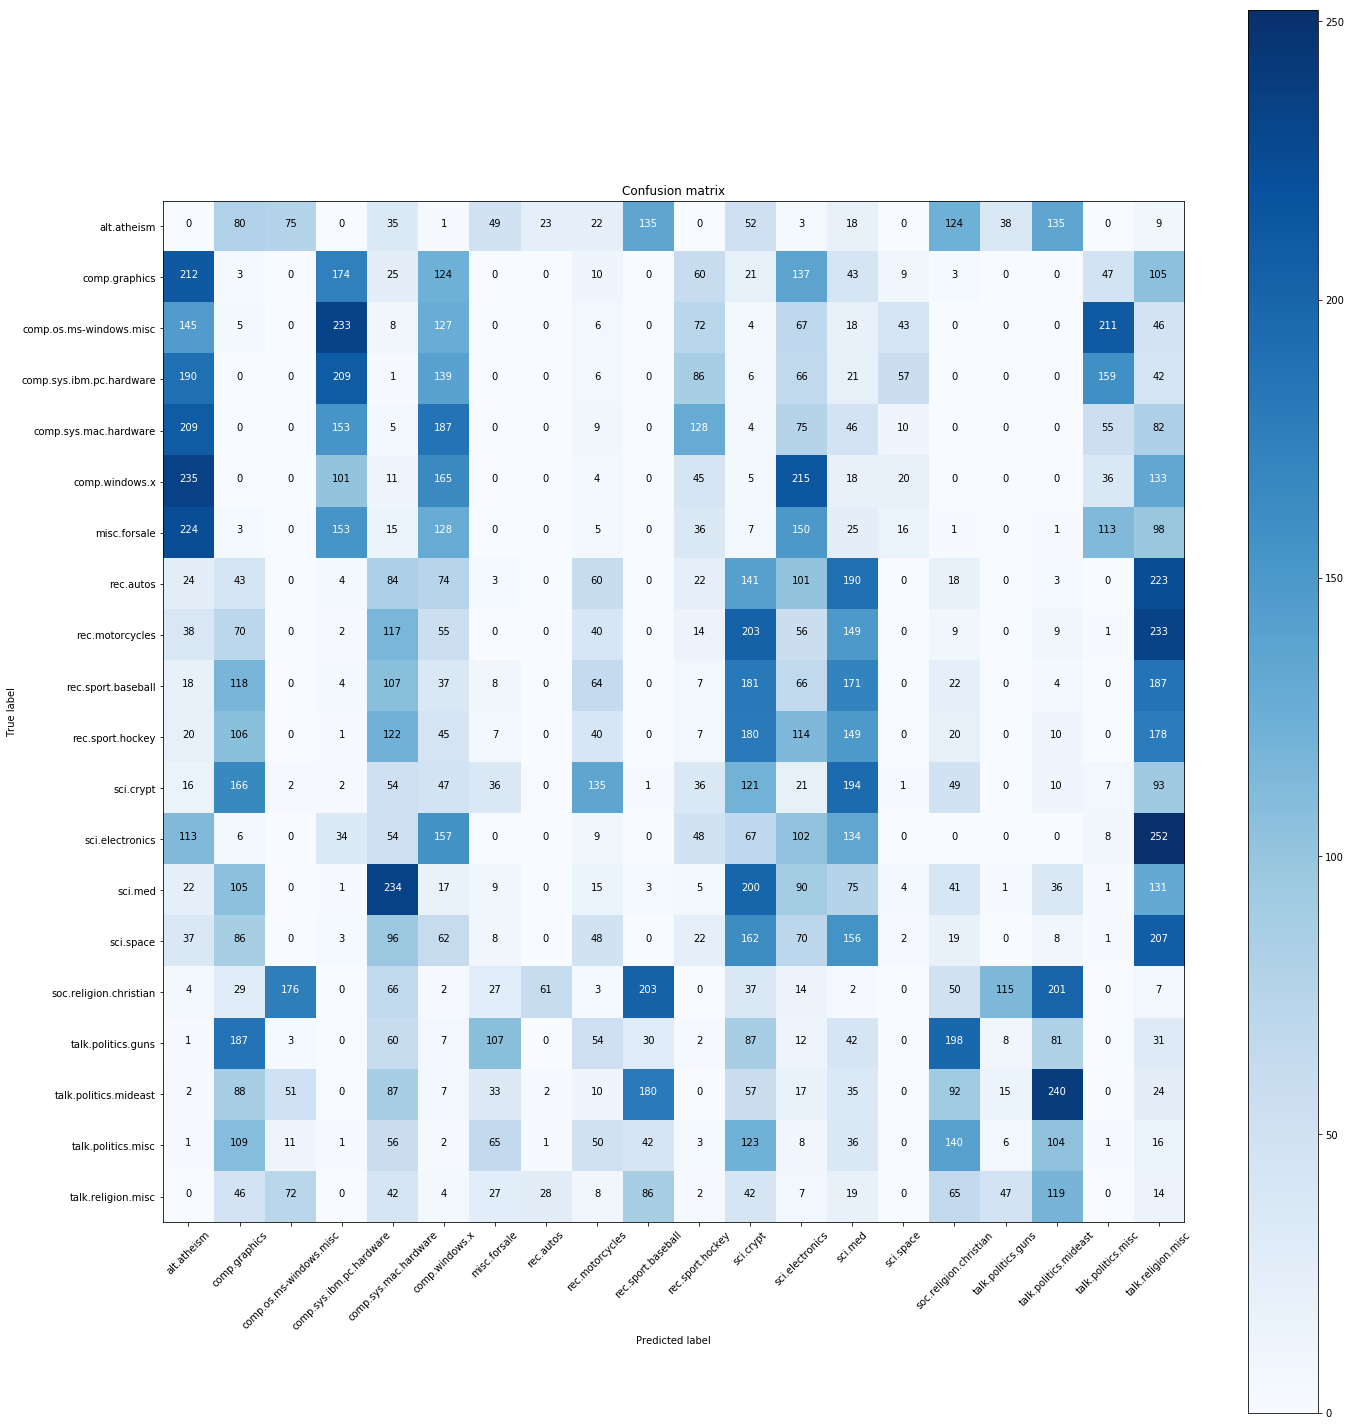

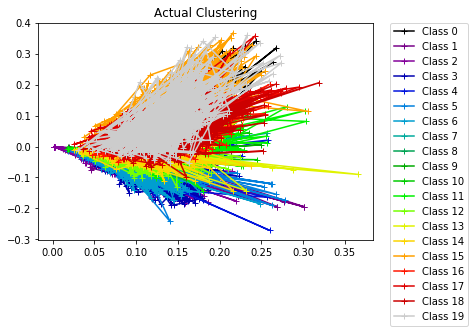

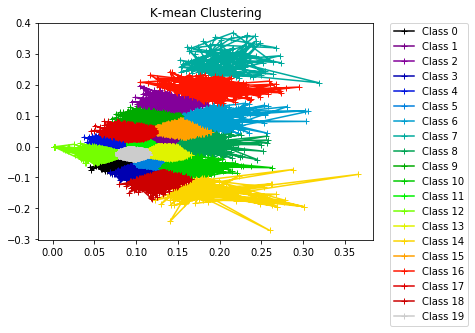

In [39]:
# Testing r = 2 (NOT REPORTED)
def visualize_svd_20(tfidf, best_r, labels):
    x_svd_2d = TruncatedSVD(n_components = best_r).fit_transform(tfidf) # n_components is desired dimensionality of output data
    
    km = KMeans(n_clusters=20, n_init = 30).fit(x_svd_2d)
    
    cm = metrics.confusion_matrix(labels, km.labels_)
    plt.figure(1)
    plot_confusion_matrix(cm, classes = twenty_dataset.target_names, normalize=False)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Transform to 2D space for visualization    
#     x_svd_2d = TruncatedSVD(n_components = 2).fit_transform(x_svd)
    
    # Ploting the actual points
    cm = plt.get_cmap('gist_rainbow')
    
    plt.figure()
    a = plt.axes()
    a.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('Actual Clustering')
    for i in xrange(0,20):
        x = x_svd_2d[labels == i][:,0]
        y = x_svd_2d[labels == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Plotting the predicted points
    plt.figure()
    b = plt.axes()
    b.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('K-mean Clustering')
    for i in xrange(0,20):
        x = x_svd_2d[km.labels_ == i][:,0]
        y = x_svd_2d[km.labels_ == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
# Testing r = 2
visualize_svd_20(tfidf_dataset_20, 2, labels_20)

## NMF

Calculating NMF for dimension, r =   1
Confusion Matrix is  [[ 39  20  84  59   1  82  88  20  52   5  72  22   0  52  69  23  12  93
    0   6]
 [120   2  42 101  44  24  71  89   9   3  79   5  17 123  30  92   2  54
    2  64]
 [ 93   4  62 105  16  40 128  41  27   0 109  16  22  99  36  52   3  87
    0  45]
 [ 87   2  55 110  20  32  96  58  34   0 108  10   2  90  63  80   1  92
    0  42]
 [ 96   1  65 102  30  38  97  57  24   3 108   7   1 102  47  75   2  72
    0  36]
 [118   1  31  89  70  16  70 102   5   7  78   5  14  99  24 105   1  52
    0 101]
 [118   0  42 100  55   9  60  94  10   1  93   3   2 118  28  96   0  72
    0  74]
 [ 75   9  53 113  22  33 111  65  28   1 110  12   1  92  54  71   1  86
    0  53]
 [100   2  49 150  15  40  93  65  10   0 133   6   0 114  30  82   0  73
    0  34]
 [ 89   8  79  91  22  39 100  46  22   1  94  17   5 110  50  65   1 115
    0  40]
 [ 80   4  55 110  38  28  96  58  14   1 101   9   7 105  48  89   1 101
    0  54]
 [ 45

Confusion Matrix is  [[  0   0   0  38 183 138   0   0 154 131   0   1   0  15   1  70  64   2
    2   0]
 [325   0   0   0  19   1   0   0 399   0   0   0   0   7   2  82 119   1
   16   2]
 [651   0   0   0  10   0   0   0 182   0   0   0  11  15  12  35  65   0
    2   2]
 [203   4   0   0   5   0   0   0 318   0   0   0 200  28   4  29 178   0
   10   3]
 [ 90   1   0   0  13   0   0   0 586   0   0   0  82  23   1  24 119   0
   10  14]
 [388   0   0   0   3   0   0   0 313   0   0   5   0   4   2  87 157   0
   27   2]
 [ 52  14   0   0  17   0   0   0 607   0   0   0  59  14   7   5 158   5
    4  33]
 [  3   1   0   0 231   0   0   0 318   0   0   0   0  21   0  27 344   3
   11  31]
 [  0   2   0   0 110   0   0   0 267   0   0   0   0   9   1 108 476   0
   17   6]
 [  0 381   0   0  26   0   0   0 422   0   0   0   0   1   1   2 146   4
    4   7]
 [  0 776   0   0   2   0   0   0 168   0   0   0   0   5   0   2  36   0
    4   6]
 [ 15   0   1   0  80   0   0   0 143   0   

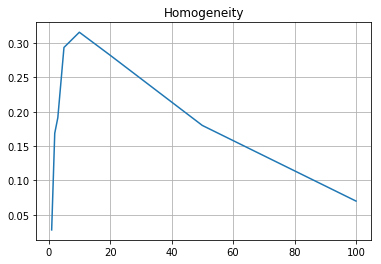

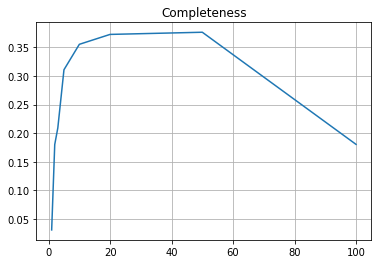

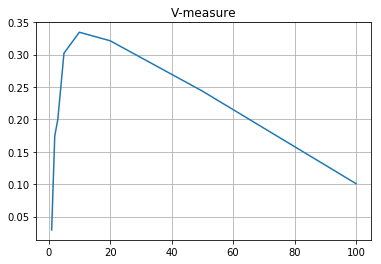

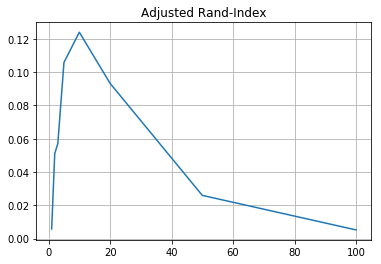

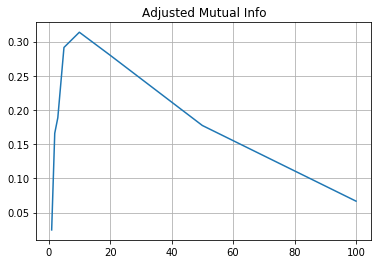

In [133]:
def calculate_NMF_score_20(tfidf, labels):
    r = [1, 2, 3, 5, 10, 20, 50, 100] 
    
    # Initialize empty arrays for plots
    homogeneity = []
    completeness = []
    vmeasure = []
    randIndex = []
    mutualInfo = []
    
    for n in r:
        print "Calculating NMF for dimension, r =  ", n
        x_nmf = NMF(n_components = n).fit_transform(tfidf) # n_components is desired dimensionality of output data
        
        km = KMeans(n_clusters=20, n_init = 30).fit(x_nmf)
        
        # For some reason, x, y position of matrix is switched in the solution
        print "Confusion Matrix is ", metrics.confusion_matrix(labels, km.labels_)
        
        homogeneity.append(metrics.homogeneity_score(labels, km.labels_))
        completeness.append(metrics.completeness_score(labels, km.labels_))
        vmeasure.append(metrics.v_measure_score(labels, km.labels_))
        randIndex.append(metrics.adjusted_rand_score(labels, km.labels_))
        mutualInfo.append(metrics.adjusted_mutual_info_score(labels, km.labels_))

    # plotting
    plt.figure(1)
    plt.title('Homogeneity')
    plt.plot(r, homogeneity)
    plt.grid()
    
    plt.figure(2)
    plt.title('Completeness')
    plt.plot(r, completeness)
    plt.grid()
    
    plt.figure(3)
    plt.title('V-measure')
    plt.plot(r, vmeasure)
    plt.grid()
    
    plt.figure(4)
    plt.title('Adjusted Rand-Index')
    plt.plot(r, randIndex)
    plt.grid()
    
    plt.figure(5)
    plt.title('Adjusted Mutual Info')
    plt.plot(r,mutualInfo)
    plt.grid()

calculate_NMF_score_20(tfidf_dataset_20, labels_20)

Confusion matrix, without normalization
Homogeneity: 0.317
Completeness: 0.357
V-measure: 0.335
Adjusted Rand-Index: 0.124
Adjusted Mutual info score: 0.314


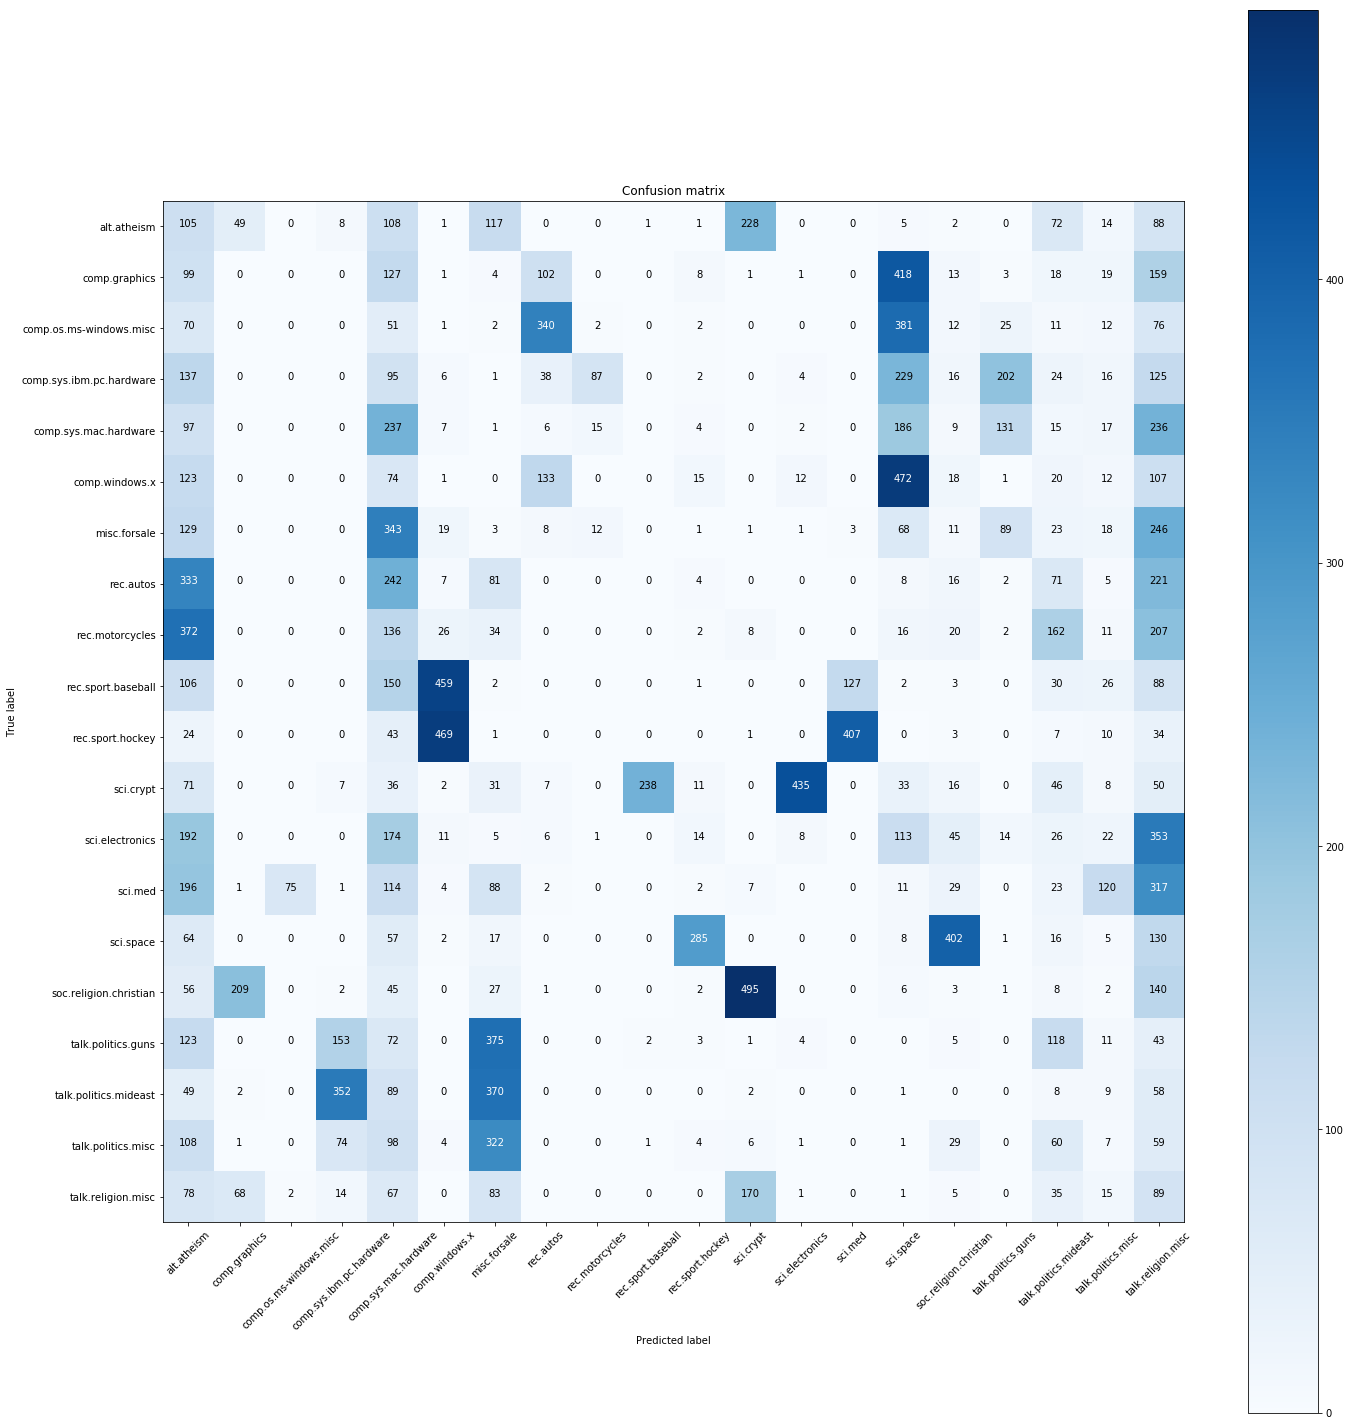

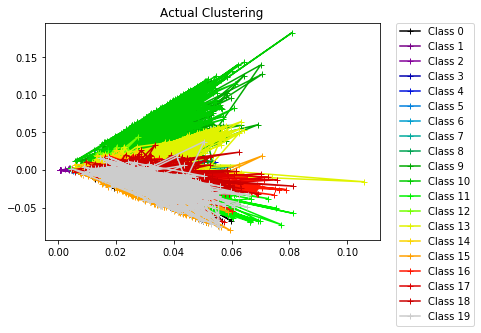

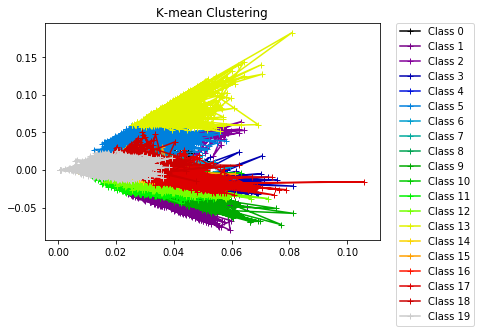

In [35]:
def visualize_svd_20(tfidf, best_r, labels):
    x_nmf = NMF(n_components = best_r).fit_transform(tfidf) # n_components is desired dimensionality of output data
    
    km = KMeans(n_clusters=20, n_init = 30).fit(x_nmf)
    
    cm = metrics.confusion_matrix(labels, km.labels_)
    plot_confusion_matrix(cm, classes = twenty_dataset.target_names, normalize=False)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual info score: %.3f" % metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    # Transform to 2D space for visualization    
    x_nmf_2d = TruncatedSVD(n_components = 2).fit_transform(x_nmf)
    
    # Ploting the actual points
    cm = plt.get_cmap('gist_rainbow')
    
    plt.figure()
    a = plt.axes()
    a.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('Actual Clustering')
    for i in xrange(0,20):
        x = x_nmf_2d[labels == i][:,0]
        y = x_nmf_2d[labels == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Plotting the predicted points
    plt.figure()
    b = plt.axes()
    b.set_prop_cycle('color',plt.cm.spectral(np.linspace(0,1,20)))
    plt.title('K-mean Clustering')
    for i in xrange(0,20):
        x = x_nmf_2d[km.labels_ == i][:,0]
        y = x_nmf_2d[km.labels_ == i][:,1]
        
        plot_label = "Class " + str(i)
        plt.plot(x,y, label = plot_label, marker='+')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

visualize_svd_20(tfidf_dataset_20, 10, labels_20)